#### *Import Libraries and Load Dataset* 

In [2]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer, KNNImputer
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

#Load Dataset
df=pd.read_csv(r'C:\Users\ASUS PC\Desktop\AMDARI INTERNSHIP\optiSecure\OptiSecure_RS\dataCleaning\df.csv', parse_dates=['claimDate','renewalDate', 'issuanceDate', 'expiryDate','interactionDate'])

In [3]:
#quick overview of dataset
print(df.head(5))

    age gender   income       location maritalStatus  \
0  34.0   Male  56462.5    Port Krista      Divorced   
1  34.0   Male  56462.5    Port Krista      Divorced   
2  34.0   Male  56462.5    Port Krista      Divorced   
3  34.0   Male  56462.5    Port Krista      Divorced   
4  31.0    NaN  32839.4  South Lisaton           NaN   

                                       policyHistory  \
0  Wear level hold century often. Wait same first...   
1  Wear level hold century often. Wait same first...   
2  Wear level hold century often. Wait same first...   
3  Wear level hold century often. Wait same first...   
4  According share well affect sea. Specific noti...   

                                        claimHistory  claimamount claimType  \
0  Its media single street you. Law party busines...     1048.770    Health   
1  Its media single street you. Law party busines...     1048.770    Health   
2  Its media single street you. Law party busines...      539.576    Health   
3  Its med

In [4]:
#structure of dataset
print(f'Rows:{df.shape[0]}, Columns: {df.shape[1]}')

Rows:8031, Columns: 21


In [5]:
print(df.dtypes)

age                       float64
gender                     object
income                    float64
location                   object
maritalStatus              object
policyHistory              object
claimHistory               object
claimamount               float64
claimType                  object
claimDate          datetime64[ns]
renewalDate        datetime64[ns]
renewalStatus              object
renewalPremium            float64
policyType                 object
premium                   float64
coverageDetails            object
issuanceDate       datetime64[ns]
expiryDate         datetime64[ns]
interactionType            object
interactionDate    datetime64[ns]
responseTime              float64
dtype: object


In [6]:
#Summary of dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8031 entries, 0 to 8030
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   age              4131 non-null   float64       
 1   gender           5513 non-null   object        
 2   income           4181 non-null   float64       
 3   location         7231 non-null   object        
 4   maritalStatus    6001 non-null   object        
 5   policyHistory    7166 non-null   object        
 6   claimHistory     7302 non-null   object        
 7   claimamount      7011 non-null   float64       
 8   claimType        7011 non-null   object        
 9   claimDate        7011 non-null   datetime64[ns]
 10  renewalDate      8031 non-null   datetime64[ns]
 11  renewalStatus    5869 non-null   object        
 12  renewalPremium   7269 non-null   float64       
 13  policyType       8031 non-null   object        
 14  premium          8031 non-null   float64

In [7]:
dateCols = ['claimDate','renewalDate', 'issuanceDate', 'expiryDate','interactionDate']
for col in dateCols:
    df[col] = pd.to_datetime(df[col], errors='coerce')

In [8]:
#handling null and missing values
numCols = df.select_dtypes(include=[np.number]).columns.to_list()
##imputer = KNNImputer(n_neighbors=6)
#df[numCols] = imputer.fit_transform(df[numCols])
numCols

['age', 'income', 'claimamount', 'renewalPremium', 'premium', 'responseTime']

In [9]:
df['age'] = df['age'].astype('int')

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

In [10]:
catCols = ['gender', 'location', 'maritalStatus', 'claimType', 'renewalStatus', 'policyType', 'interactionType']
for col in catCols:
    df[col] = df[col].astype('category')

#### *Dealing with Categorical Columns Using Segment-wise mode*.

In [11]:
catCols = [col for col in df.select_dtypes(include = ['category']).columns.tolist() if col != 'location']

for col in catCols:


    grouped = df.groupby('location')[col]

    for location, group in grouped:
        mode_value = group.mode()
        if not mode_value.empty:  # check if mode exists
            mode_value = mode_value.iloc[0]
        
        else:
            mode_value =df[col].mode()[0]

            df.loc[df['location'] == location, col] = df.loc[df['location'] == location, col].fillna(mode_value)

## *Univariate Analysis*

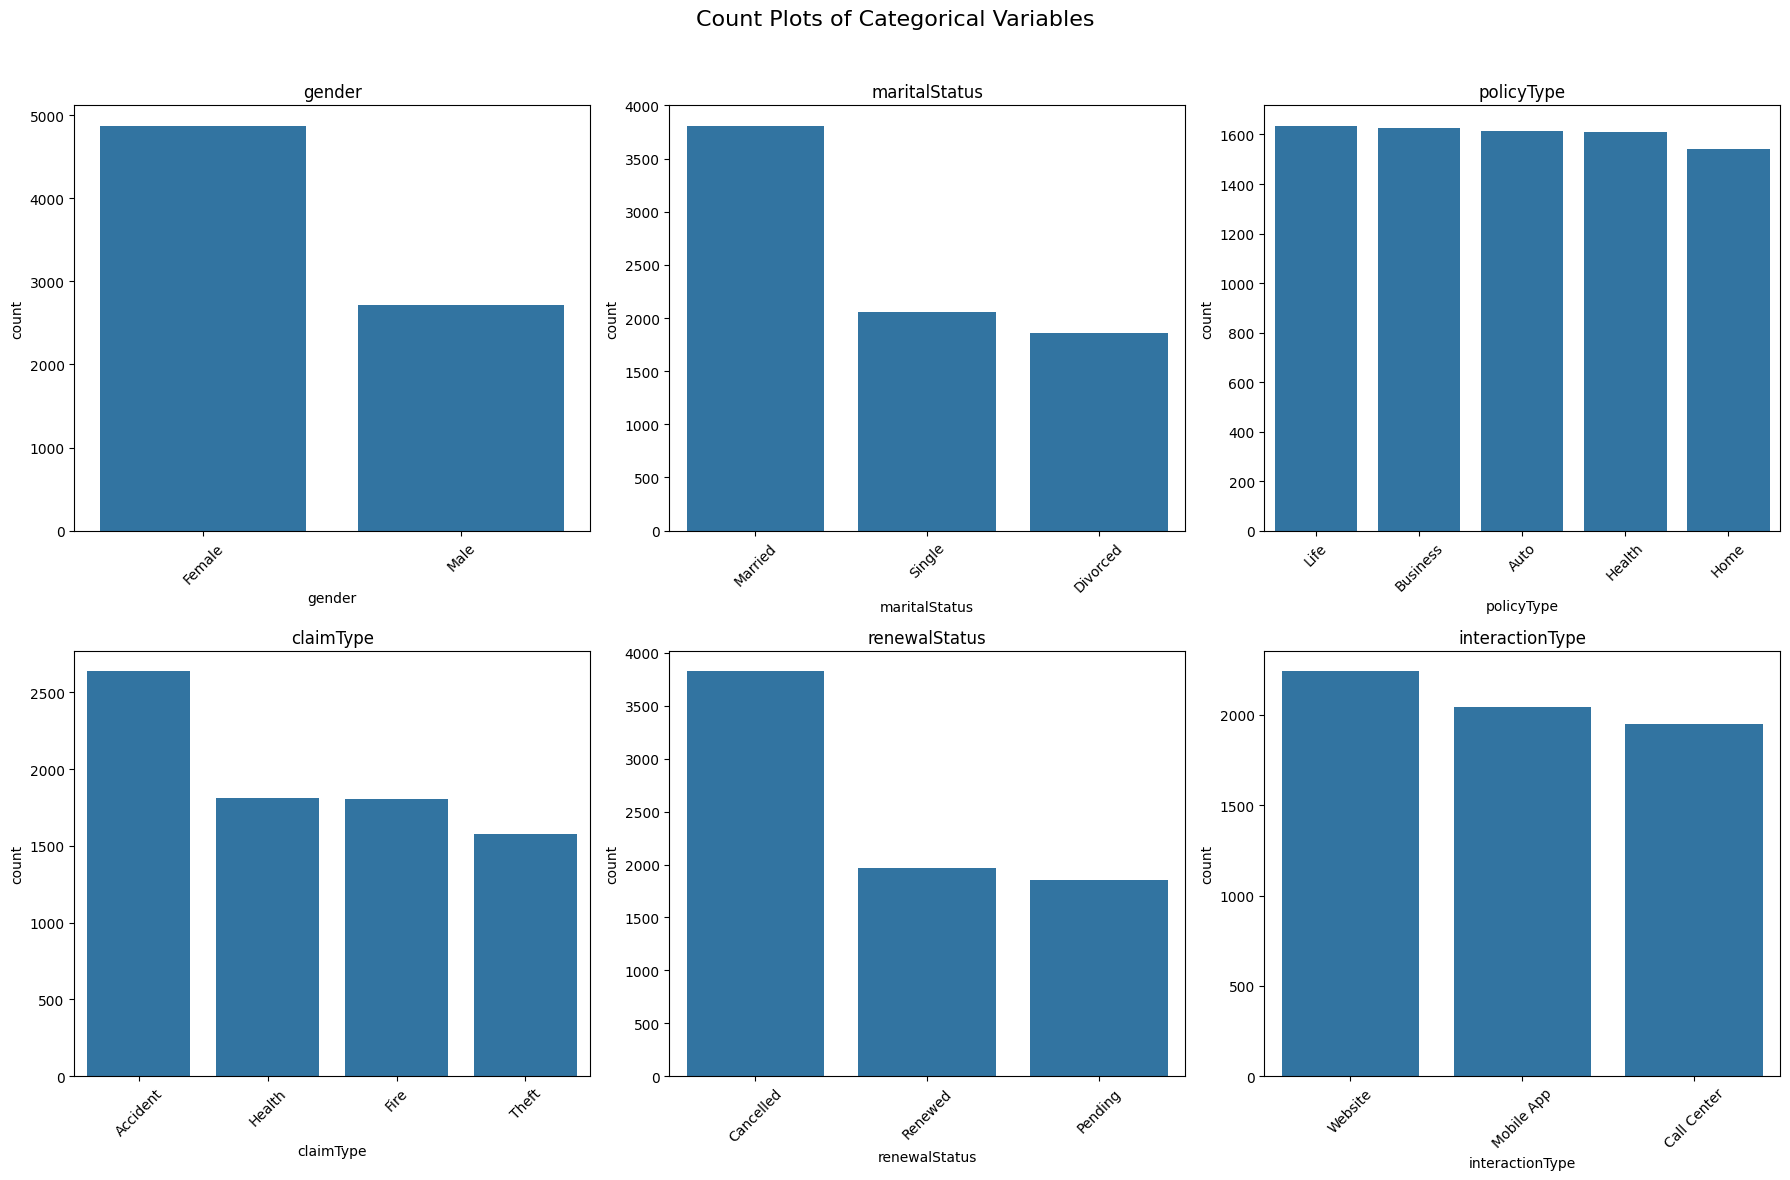

In [12]:
catCols = ['gender','maritalStatus','policyType','claimType','renewalStatus','interactionType']
fig, axes = plt.subplots(2,3, figsize=(18, 12))
fig.suptitle('Count Plots of Categorical Variables', fontsize=16)
for i, col in enumerate(catCols):
    sns.countplot(x=col, data=df, ax=axes[i//3, i%3], order=df[col].value_counts().index)
    axes[i//3, i%3].set_title(col)
    axes[i//3, i%3].tick_params(axis='x', rotation=45)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

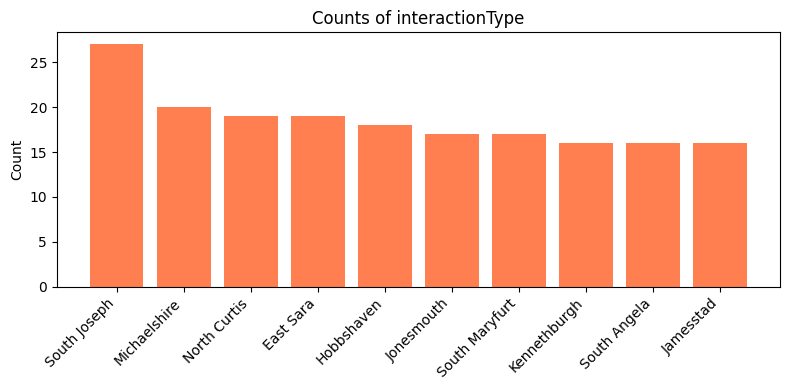

In [13]:
    counts = df['location'].value_counts().head(10)  
    fig, ax = plt.subplots(figsize=(8,4))
    ax.bar(counts.index.astype(str), counts.values, color='coral')
    ax.set_title(f'Counts of {col}')
    ax.set_ylabel("Count")
    ax.set_xticklabels(counts.index.astype(str), rotation=45, ha='right')
    plt.tight_layout()

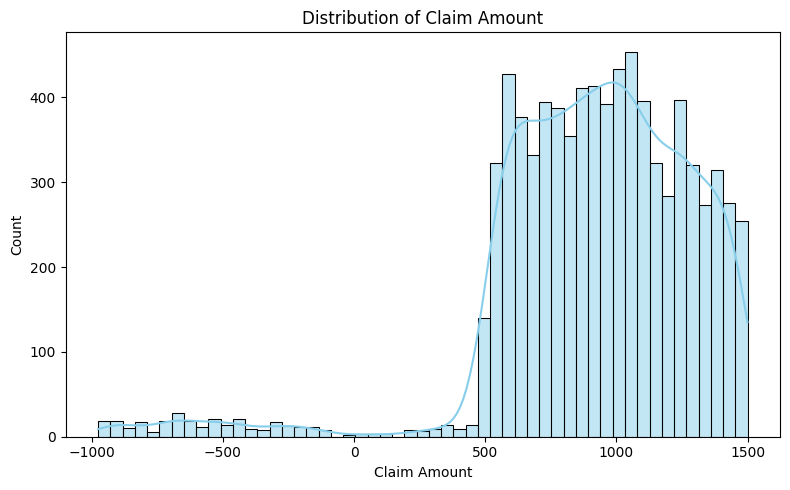

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.histplot(df['claimamount'], kde=True, ax=ax, color='skyblue')
ax.set_title("Distribution of Claim Amount")
ax.set_xlabel("Claim Amount")
plt.tight_layout()

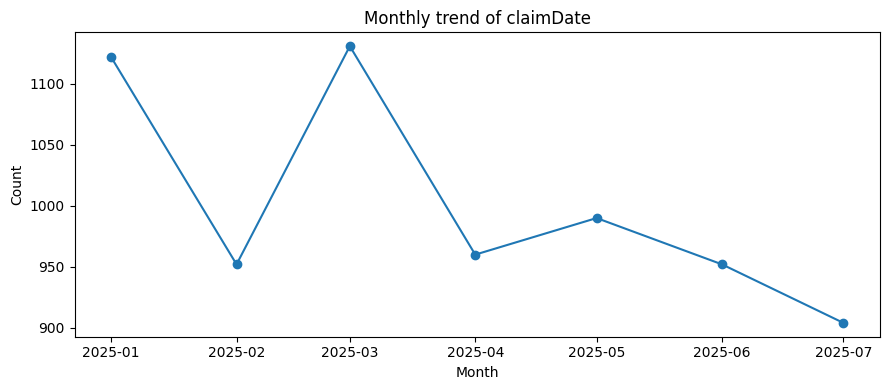

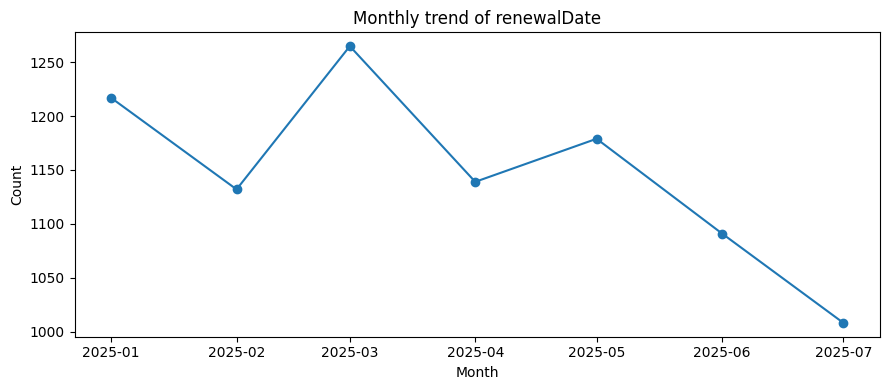

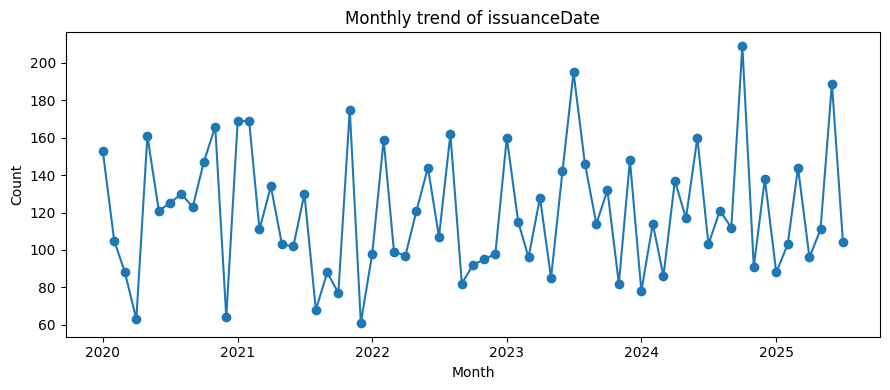

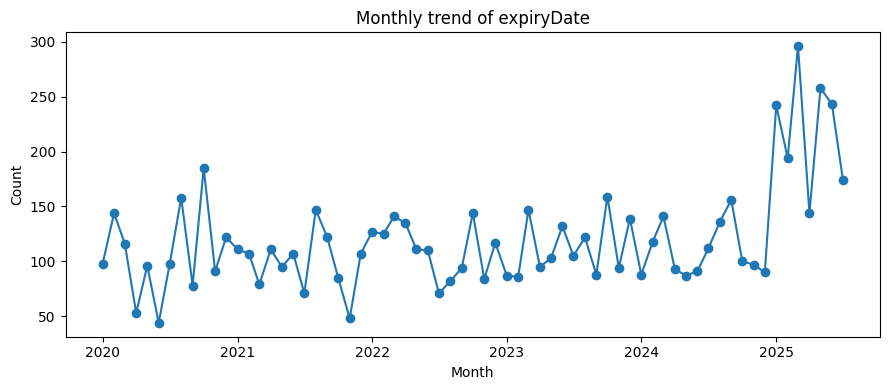

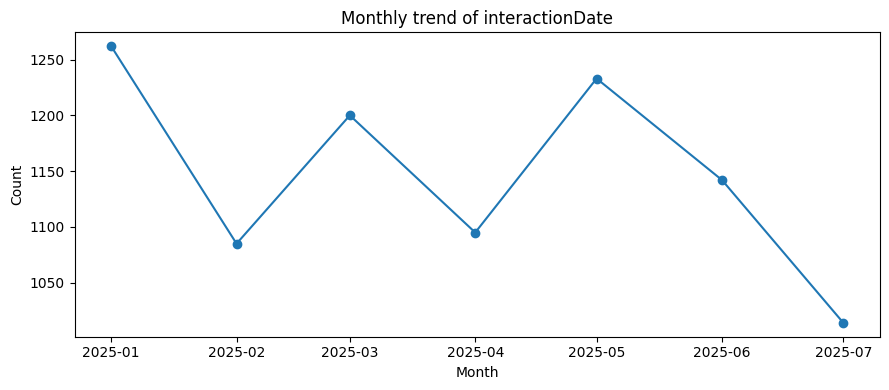

In [19]:
date_cols = ['claimDate','renewalDate','issuanceDate','expiryDate','interactionDate']

for col in date_cols:
    monthly = df[col].dt.to_period('M').value_counts().sort_index()
    fig, ax = plt.subplots(figsize=(9,4))
    ax.plot(monthly.index.to_timestamp(), monthly.values, marker='o')
    ax.set_title(f'Monthly trend of {col}')
    ax.set_xlabel("Month"); ax.set_ylabel("Count")
    plt.tight_layout()

## *Bivariate Analysis*

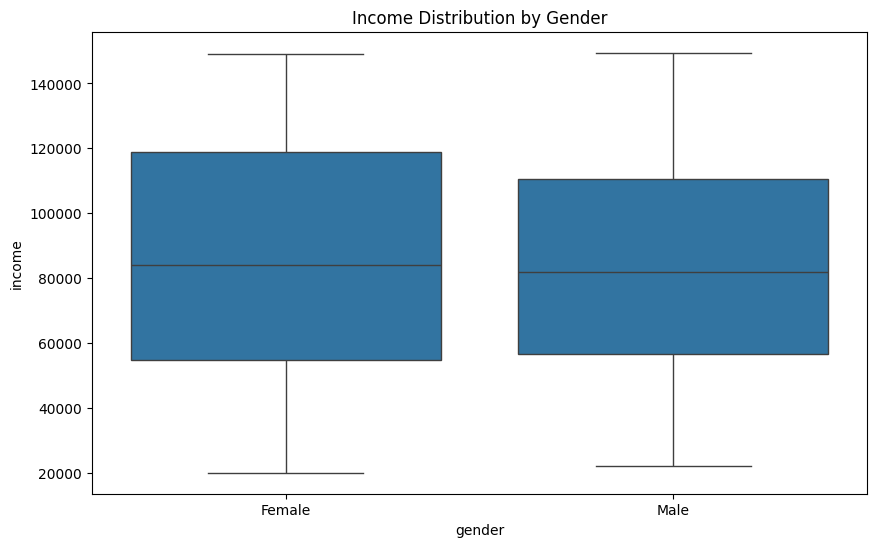

In [14]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(x='gender', y='income', data=df, ax=ax)
ax.set_title('Income Distribution by Gender')
plt.show()

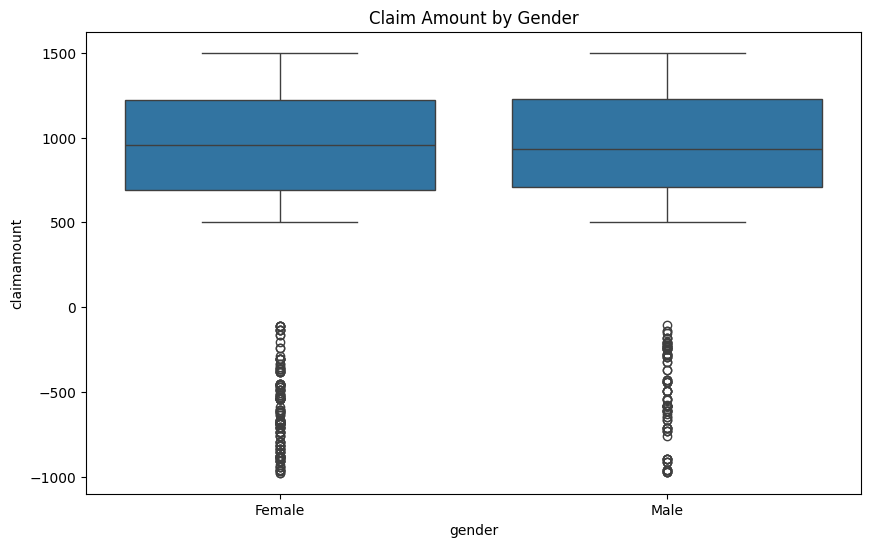

In [15]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(x='gender', y='claimamount', data=df, ax=ax)
ax.set_title('Claim Amount by Gender')
plt.show()

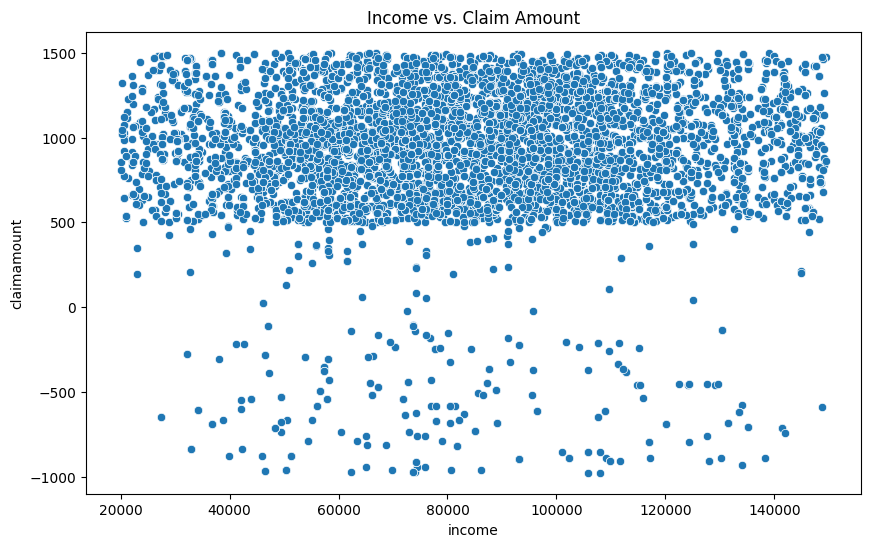

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(x='income', y='claimamount', data=df, ax=ax)
ax.set_title('Income vs. Claim Amount')
plt.show()

## *Multivariate Analysis*

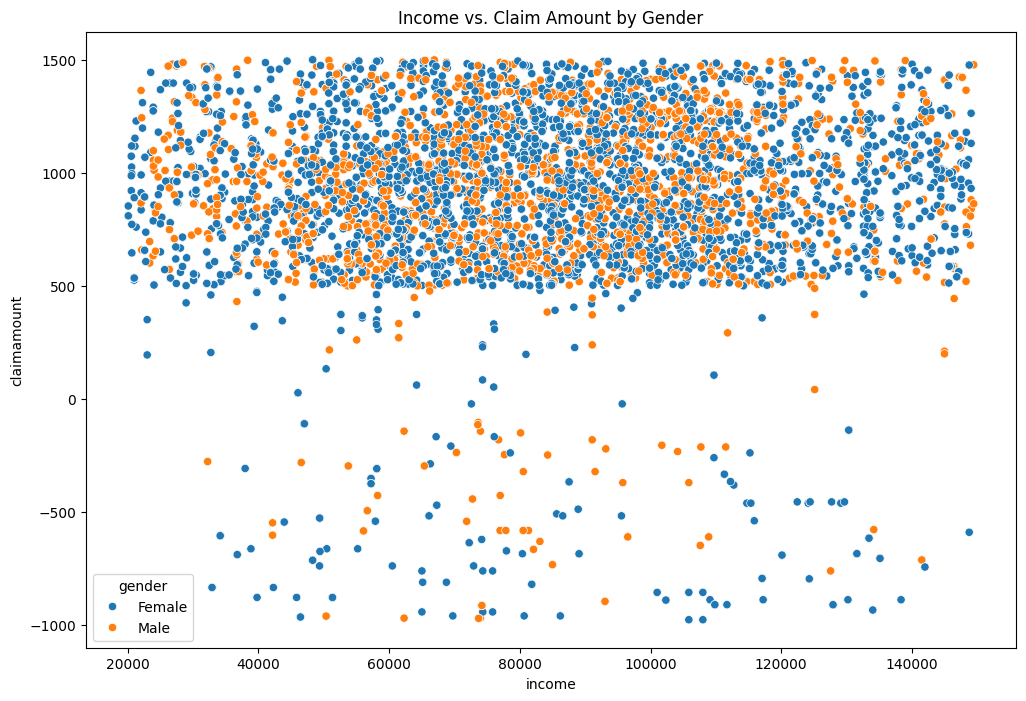

In [ ]:
# A Scatter plot of income vs claimamount, with gender as hue
fig, ax = plt.subplots(figsize=(12, 8))
sns.scatterplot(x='income', y='claimamount', hue='gender', data=df, ax=ax)
ax.set_title('Income vs. Claim Amount by Gender')
plt.show()

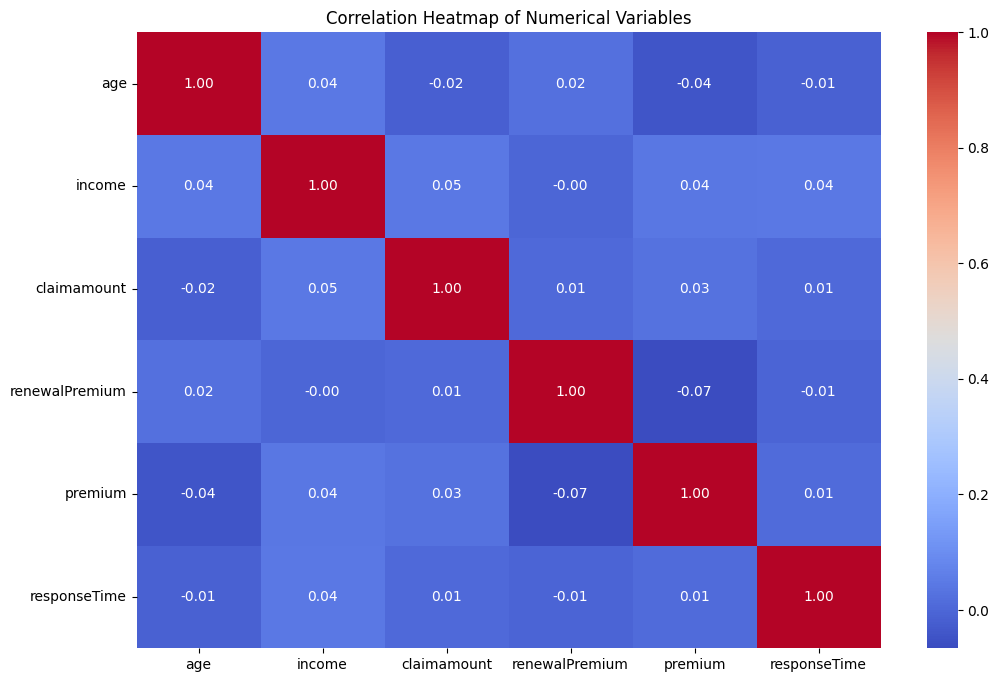

In [ ]:
# A correlation heatmap of Numerical cols
fig, ax = plt.subplots(figsize=(12, 8))
correlation_matrix = df[numCols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", ax=ax)
ax.set_title('Correlation Heatmap of Numerical Variables')
plt.show()

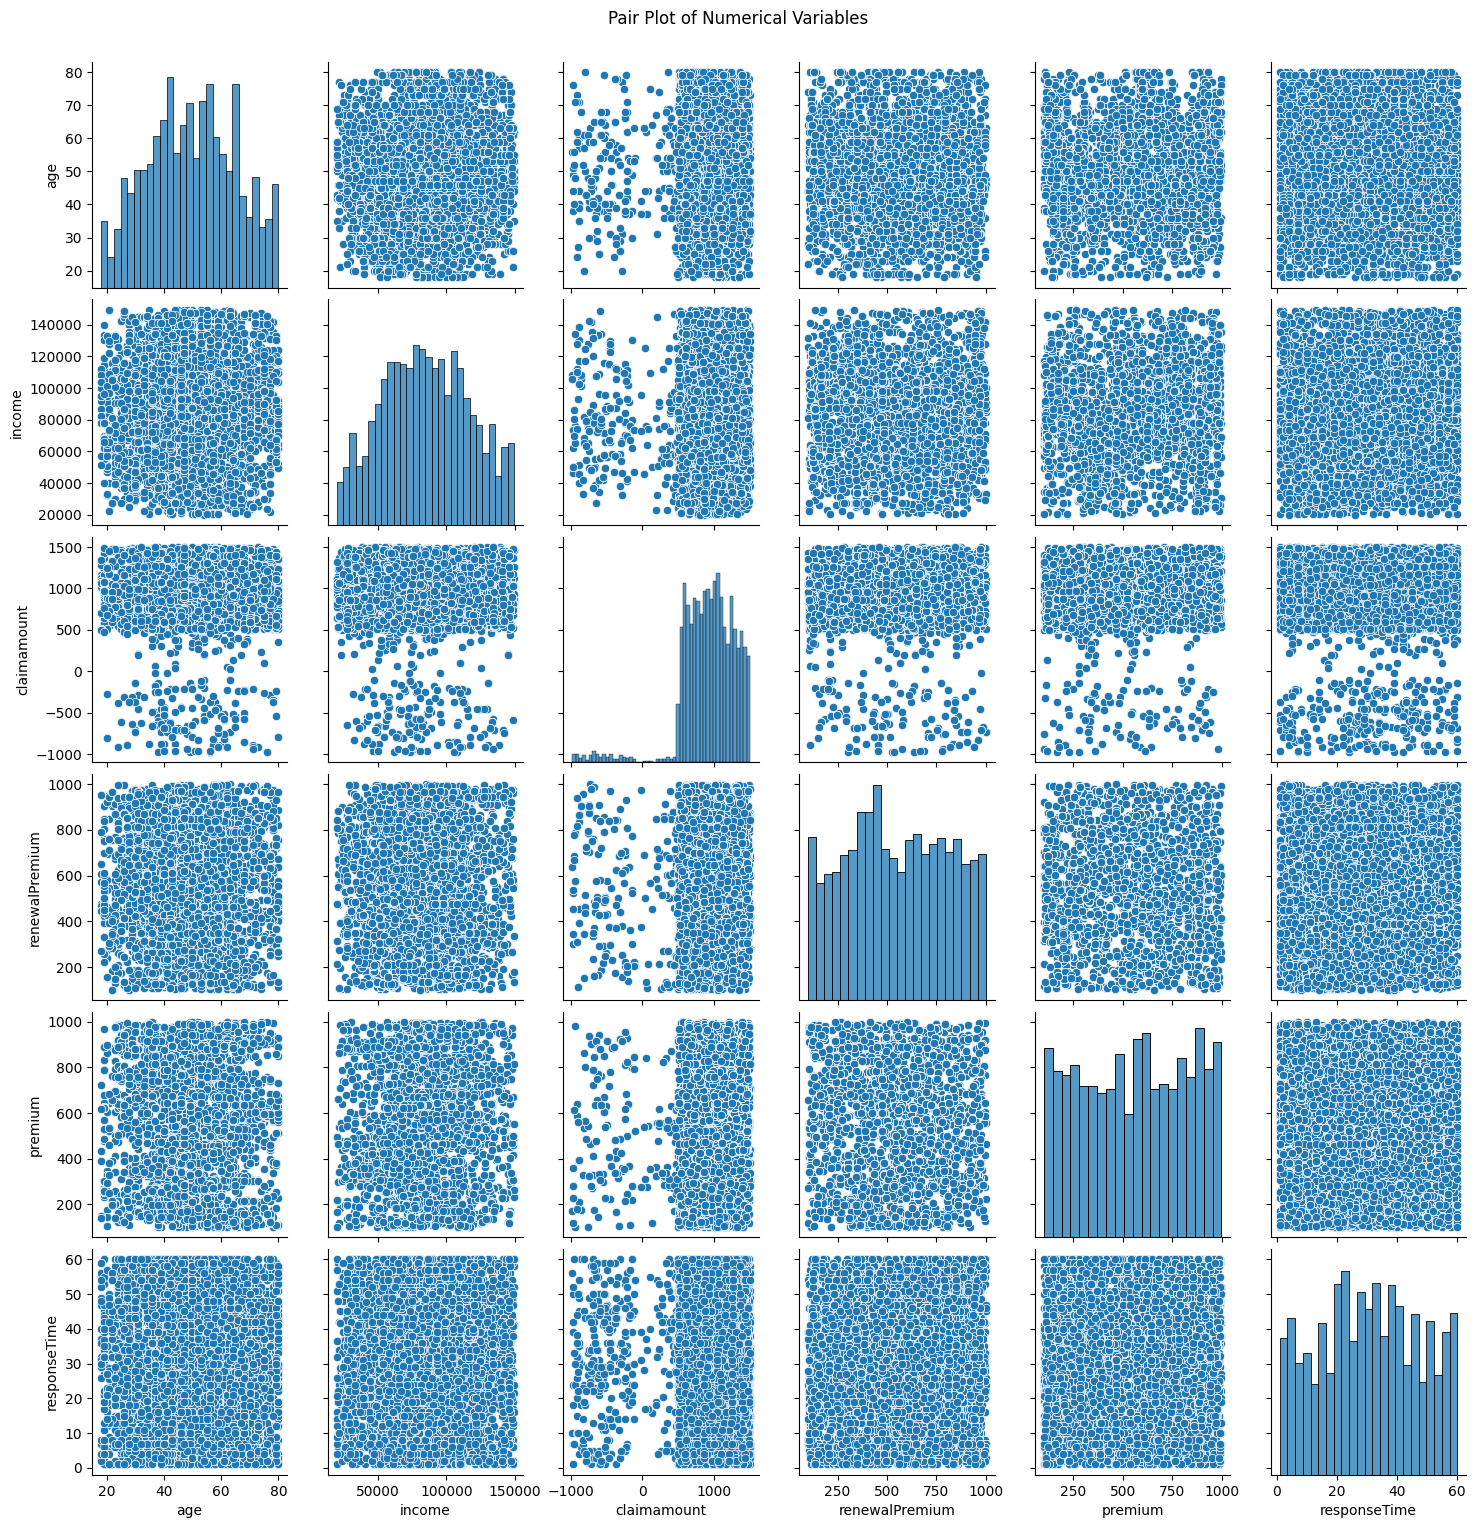

In [ ]:
# Pair plot of numerical variables

g = sns.pairplot(df[numCols])
g.fig.suptitle('Pair Plot of Numerical Variables', y=1.02) 
plt.show()